In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/galaxy_noise.csv', index_col=0)
df.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold,index,...,color_sentiment,color_sentiment2,carrier_NaN,carrier_none,productline_imputed,productline_imputed2,productSeries_imputed,product_isNote_imputed,productSeries_imputed2,product_isNote_imputed2
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1,0,...,0,0,0,1,Galaxy_S9,Galaxy_S9,2,0,2,0
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0,1,...,0,-1,0,1,Galaxy_Note9,Galaxy_Note9,2,1,2,1
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0,2,...,0,-1,1,-1,Galaxy_S8,Galaxy_S10,1,0,3,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1,3,...,1,1,0,0,Galaxy_Note9,Galaxy_Note9,2,1,2,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1,4,...,1,1,0,1,Galaxy_S8,Galaxy_S8,1,0,1,0


# df.noDescription
# df.charCountDescription
# df.upperCaseDescription

In [ ]:
df[['noDescription', 'charCountDescription', 'upperCaseDescription']]

In [ ]:
df['noDescription'].unique()

In [ ]:
df['hasDescription'] = df['noDescription'].apply(lambda x: 1 if x=='contains description' else 0)

In [ ]:
df.groupby('hasDescription')['sold'].mean()

In [ ]:
df.groupby('hasDescription')['BuyItNow'].mean()

In [ ]:
df.groupby('hasDescription')['startprice'].mean()

In [ ]:
df[['charCountDescription', 'upperCaseDescription']]

In [ ]:
sns.histplot(df['charCountDescription'], bins=10)

In [ ]:
df['charCountDescriptionBins'] = df['charCountDescription'].apply(lambda x: 0 if x==0
                                                                    else 1 if (x<90)
                                                                    else 2)

In [ ]:
df.groupby('charCountDescriptionBins')['sold'].mean()

In [ ]:
df.groupby('charCountDescriptionBins')['BuyItNow'].mean()

In [ ]:
sns.histplot(x='startprice', data=df, hue='charCountDescriptionBins')

In [ ]:
df.groupby('charCountDescriptionBins')['productline'].value_counts()

# startprice
- BuyItNow 여부, 모델 라인, 판매 여부에 따른 **싯가**의 표본확률분포 생성
    - 싯가의 표본확률분포는 정규분포를 형성한다고 가정?
    - 정규분포는 **매우 저렴한 상품의 낙찰율을 낮게 계산**하므로 다른 분포 필요
- BuyItNow/모델/판매여부에 따른 특정한 **싯가** 확률분포로부터 startprice가 확률변수로 발생할 확률을 계산
    
> 해당 확률이 threshold(ex. 0.5) 미만이면 NOT SOLD, threshold 이상이면 SOLD로 예측하여 accuracy를 측정해 본다.

> 유의미한 결과가 도출될 경우, startprice 컬럼을 대체하여 사용한다.

### CAUTION:
- 싯가 확률분포 확률값을 사용할 경우, train셋으로부터 구한 확률분포 정보를 기반으로 test 셋을 처리해 주어야 한다.
- train + test 합쳐진 상태에서 확률분포를 구할 시, 이미 정답을 알고 있는 상태에서 예측하는 것이 됨.

# chi2, F분포
# 다변수정규분포 (!)

In [3]:
df.columns

Index(['BuyItNow', 'startprice', 'carrier', 'color', 'productline',
       'noDescription', 'charCountDescription', 'upperCaseDescription', 'sold',
       'index', 'color_NaN', 'color_sentiment', 'color_sentiment2',
       'carrier_NaN', 'carrier_none', 'productline_imputed',
       'productline_imputed2', 'productSeries_imputed',
       'product_isNote_imputed', 'productSeries_imputed2',
       'product_isNote_imputed2'],
      dtype='object')

In [4]:
# imputed version 1
# (ksd, wd, cd - 통계적 거리 기반, S8/S9로 productline 결측치 대체)
pd.concat([df.groupby(['BuyItNow', 'productline_imputed', 'sold'])['startprice'].mean(),
           df.groupby(['BuyItNow', 'productline_imputed', 'sold'])['startprice'].std()],
           axis=1)

startprice  startprice
BuyItNow productline_imputed sold                        
0        Galaxy_Note10       0     468.784540  151.063692
                             1     400.213243  126.137797
         Galaxy_Note8        0     258.026102  115.545331
                             1     198.411765   57.352077
         Galaxy_Note9        0     317.981957   90.610241
                             1     325.262000  101.825963
         Galaxy_S10          0     296.917500   47.263311
                             1     336.333333   85.031367
         Galaxy_S7           0     126.981750   55.854296
                             1      84.726897   43.005072
         Galaxy_S8           0     229.743960  139.351843
                             1     182.019697   67.573664
         Galaxy_S9           0     317.914054  106.673186
                             1     232.317556  134.988841
1        Galaxy_Note10       0     416.711071  157.272237
                             1     185.255179  163.210379
         Galaxy_Note8        0     198.855000   96.602136
                             1      88.213333   82.267983
         Galaxy_Note9        0     267.911667   96.447946
                             1     132.853824   96.252107
         Galaxy_S10          1     160.000000         NaN
         Galaxy_S7           0     122.860000   97.206543
                             1      39.506146   37.346137
         Galaxy_S8           0     191.691385  134.742764
                             1      65.269032   68.352347
         Galaxy_S9           0     236.517368  104.836709
                             1      89.381304   80.056522

In [5]:
# imputed version 2 
# (ksd p-value 유의확률 기반, S10/S8로 productline 결측치 대체)
pd.concat([df.groupby(['BuyItNow', 'productline_imputed2', 'sold'])['startprice'].mean(),
           df.groupby(['BuyItNow', 'productline_imputed2', 'sold'])['startprice'].std()],
           axis=1)

startprice  startprice
BuyItNow productline_imputed2 sold                        
0        Galaxy_Note10        0     468.784540  151.063692
                              1     400.213243  126.137797
         Galaxy_Note8         0     258.026102  115.545331
                              1     198.411765   57.352077
         Galaxy_Note9         0     317.981957   90.610241
                              1     325.262000  101.825963
         Galaxy_S10           0     211.758776  148.990959
                              1     243.239310  161.738456
         Galaxy_S7            0     126.981750   55.854296
                              1      84.726897   43.005072
         Galaxy_S8            0     248.551759  126.225511
                              1     182.019697   67.573664
         Galaxy_S9            0     317.914054  106.673186
                              1     232.071053   79.149773
1        Galaxy_Note10        0     416.711071  157.272237
                              1     185.255179  163.210379
         Galaxy_Note8         0     198.855000   96.602136
                              1      88.213333   82.267983
         Galaxy_Note9         0     267.911667   96.447946
                              1     132.853824   96.252107
         Galaxy_S10           1      62.843509   78.804124
         Galaxy_S7            0     122.860000   97.206543
                              1      39.506146   37.346137
         Galaxy_S8            0     191.691385  134.742764
                              1      67.622424   62.255231
         Galaxy_S9            0     236.517368  104.836709
                              1      89.381304   80.056522

# outliers in startprice
- 싯가 분포에서 멀리 떨어져 있는 상품들
    - 급매? startprice가 매우 낮은 매물이 존재한다.
    - startprice가 매우 낮은 매물은 **매우 높은 확률로** 낙찰.

In [9]:
len(df[df['startprice']<10]), df[df['startprice']<10]['sold'].mean()

(159, 0.949685534591195)

In [8]:
len(df[df['startprice']<30]), df[df['startprice']<30]['sold'].mean()

(207, 0.9033816425120773)

In [10]:
len(df[df['startprice']<50]), df[df['startprice']<30]['sold'].mean()

(252, 0.9033816425120773)

In [11]:
len(df[df['startprice']<85]), df[df['startprice']<85]['sold'].mean()

(381, 0.8320209973753281)

#### 어디까지가 '후려친 가격'인가?

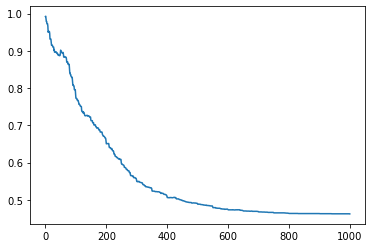

In [16]:
plt.plot([df[df['startprice']<i]['sold'].mean() for i in range(1, 1001)])

# MissForest ?!
- 원본 df에서 label encoding만 해주고
- NaN 포함된 feature(color-NaN, carrier-NaN, productline-Unknown)
    - 그대로 살려놓은 상태에서 통째로 넣고 돌리기

In [ ]:
from missingpy import MissForest